Time to really dig into the CVn parameters with the interpolator.

need a blackbody convolution function, as well as a generator for arbitraty parameter sets for the interpolation function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import ac
import os
from astropy.modeling.blackbody import blackbody_lambda

In [2]:
def Dwarf_Logg(TEMP):
    if TEMP < 5000.:
        return -0.0001489 *TEMP + 5.603
    
    else:
        return -6.824e-11 * np.power(TEMP, 3) + 1.003e-06 *np.power(TEMP, 2) - 0.005087 *TEMP + 13.73
    
    
def Giant_Logg(TEMP):
    logg = -2.2e-08 * np.power(TEMP, 2) + 0.00294 * TEMP - 12.17
    if logg < 0.0:
        return 0.0
    return logg

In [3]:
### CVn 

# T:  4000, 4100, 4200, 4300, 4500


# z=-3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3.0
#A(C) = 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4





In [3]:
# first
# T = 4000 K, log(g) = 0.0, A(C)=6.5, [Fe/H] = [-3.0, -4.0]

feh_span = np.linspace(-2.0, -4.0, 25)

file_out = open("params/T4200_test.dat", 'w')

for i in range(len(feh_span) - 1):
    file_out.write("4200.0,0.0," + "%.2F" % feh_span[i] + "," + '%.2F' % ac.cfe(6.5, feh_span[i]) + "\n")
 

file_out.write("4200.0,0.0," + "%.2F" % feh_span[-1] + "," + '%.2F' % ac.cfe(6.5, feh_span[-1]))

file_out.close()


In [174]:
feh_span = np.linspace(-1.0, -4.0, 30)
temp = 4500
log = 0.5

pd.DataFrame({"T":np.ones(len(feh_span))*temp, 
              "g":np.ones(len(feh_span))*log, 
              "feh": feh_span,
              "cfe" : [ac.cfe(7.7, feh) for feh in feh_span]})[['T', 'g', 'feh', 'cfe']].to_csv("params/params_7.7/T" + str(temp) + "_AC7.7_param.dat", index=False)

In [60]:
ac.ac

<function ac.ac>

In [13]:
t_span = np.linspace(4000, 5000, 20)
pd.DataFrame({"T":t_span, 
              "g":[Dwarf_Logg(t) for t in t_span],
              "feh":np.ones(20)*-3.5,
              "cfe":np.ones(20)*1.0})[['T','g','feh','cfe']].to_csv('params/regroup/group2_3.5_dwarf.dat', index=False)

In [41]:
#group1
t_span = np.linspace(4000, 5000, 20)
pd.DataFrame({"T":t_span, 
              "g":[Dwarf_Logg(t) for t in t_span],
              "feh":np.ones(20)*-1.5,
              "cfe":np.ones(20)*1.07})[['T','g','feh','cfe']].to_csv('params/regroup/group1_dwarf.dat', index=False)
pd.DataFrame({"T":t_span, 
              "g":[Giant_Logg(t) for t in t_span],
              "feh":np.ones(20)*-1.5,
              "cfe":np.ones(20)*1.07})[['T','g','feh','cfe']].to_csv('params/regroup/group1_giant.dat', index=False)

#group2
pd.DataFrame({"T":t_span, 
              "g":[Dwarf_Logg(t) for t in t_span],
              "feh":np.ones(20)*-3.0,
              "cfe":np.ones(20)*0.87})[['T','g','feh','cfe']].to_csv('params/regroup/group2_dwarf.dat', index=False)
pd.DataFrame({"T":t_span, 
              "g":[Giant_Logg(t) for t in t_span],
              "feh":np.ones(20)*-3.0,
              "cfe":np.ones(20)*0.87})[['T','g','feh','cfe']].to_csv('params/regroup/group2_giant.dat', index=False)


#group3
pd.DataFrame({"T":t_span, 
              "g":[Dwarf_Logg(t) for t in t_span],
              "feh":np.ones(20)*-3.5,
              "cfe":np.ones(20)*2.37})[['T','g','feh','cfe']].to_csv('params/regroup/group3_dwarf.dat', index=False)
pd.DataFrame({"T":t_span, 
              "g":[Giant_Logg(t) for t in t_span],
              "feh":np.ones(20)*-3.5,
              "cfe":np.ones(20)*2.37})[['T','g','feh','cfe']].to_csv('params/regroup/group3_giant.dat', index=False)

In [63]:
Giant_Logg(4200)

0.0

In [210]:
### Now repeat for G77
feh_span = np.linspace(-1.0, -4.0, 30)
#temp = 4500
log = 5
cfe = 8.0

for temp in [4000, 4100, 4200, 4300, 4400, 4500]:
    pd.DataFrame({"T":np.ones(len(feh_span))*temp, 
              "g":np.ones(len(feh_span))*log, 
              "feh": feh_span,
              "cfe" : [ac.cfe(cfe, feh) for feh in feh_span]})[['T', 'g', 'feh', 'cfe']].to_csv("params/G77/params_%.1F"%cfe+"/T" + str(temp) + "_AC%.1F"%cfe+"_param.dat", index=False)

In [62]:
#### Now span AC for final parameter values

### G77
ac_span = np.linspace(6.5,8.2, 25)

pd.DataFrame({"T":np.ones(len(ac_span))*4000,
              'g':np.ones(len(ac_span))*5.00,
              'feh':np.ones(len(ac_span))*-4.0,
              'cfe':[ac.cfe(ace, -4.0) for ace in ac_span]})[['T', 'g', 'feh', 'cfe']].to_csv('params/G77/final_ace_params.dat', index=False)
    
pd.DataFrame({"T":np.ones(len(ac_span))*4200,
              'g':np.ones(len(ac_span))*0.2,
              'feh':np.ones(len(ac_span))*-3.25,
              'cfe':[ac.cfe(ace, -3.25) for ace in ac_span]})[['T', 'g', 'feh', 'cfe']].to_csv('params/CVn/final_ace_params.dat', index=False)
    
    



### CVn



In [226]:
#feh_span = np.linspace(-2.0, -4.0, 25)
files = os.listdir("params/params_8.0")
frames = [pd.read_csv('params/params_8.0/' + file) for file in files]
pd.concat(frames).to_csv("params/G77/AC_8.0_params.dat", header=None, index=False)
#

In [177]:
pd.concat(frames).to_csv("params/G77/AC_7.7_params.dat", header=None, index=False)

### Convolution 

In [14]:
path = '/Users/masterd/Google Drive/Yoon_UMP/synthetic/dwarf/GII/'

files = os.listdir(path)

frames = [pd.read_csv(path + file) for file in files]

In [15]:
#frames[3][frames[3]['flux'] <0.0]

In [16]:
offset=0.00
for frame, file in zip(frames, files):
    frame.loc[:, "bflux"] = (frame['flux']+offset)*blackbody_lambda(frame['wl'], float(file.split("T")[1].split("g")[0]))
    frame.to_csv(path + file, index=False)

In [3]:
DIRECTORIES = ["T4000_AC6.5","T4100_AC6.9","T4200_AC7.3", "T4300_AC7.7", "T4500_AC6.5",
"T4000_AC6.6","T4100_AC7.0","T4200_AC7.4", "T4300_AC7.8", "T4500_AC6.6",
"T4000_AC6.7","T4100_AC7.1","T4200_AC7.5", "T4300_AC7.9", "T4500_AC6.7",
"T4000_AC6.8","T4100_AC7.2","T4200_AC7.6", "T4300_AC8.0", "T4500_AC6.8",
"T4000_AC6.9","T4100_AC7.3","T4200_AC7.7", "T4400_AC6.5", "T4500_AC6.9",
"T4000_AC7.0","T4100_AC7.4","T4200_AC7.8", "T4400_AC6.6", "T4500_AC7.0",
"T4000_AC7.1","T4100_AC7.5","T4200_AC7.9", "T4400_AC6.7", "T4500_AC7.1",
"T4000_AC7.2","T4100_AC7.6","T4200_AC8.0", "T4400_AC6.8", "T4500_AC7.2",
"T4000_AC7.3","T4100_AC7.7","T4300_AC6.5", "T4400_AC6.9", "T4500_AC7.3",
"T4000_AC7.4","T4100_AC7.8","T4300_AC6.6", "T4400_AC7.0", "T4500_AC7.4",
"T4000_AC7.5","T4100_AC7.9","T4300_AC6.7", "T4400_AC7.1", "T4500_AC7.5",
"T4000_AC7.6","T4100_AC8.0","T4300_AC6.8", "T4400_AC7.2", "T4500_AC7.6",
"T4000_AC7.7","T4200_AC6.5","T4300_AC6.9", "T4400_AC7.3", "T4500_AC7.7",
"T4000_AC7.8","T4200_AC6.6","T4300_AC7.0", "T4400_AC7.4", "T4500_AC7.8",
"T4000_AC7.9","T4200_AC6.7","T4300_AC7.1", "T4400_AC7.5", "T4500_AC7.9",
"T4000_AC8.0","T4200_AC6.8","T4300_AC7.2", "T4400_AC7.6", "T4500_AC8.0",
"T4100_AC6.5","T4200_AC6.9","T4300_AC7.3","T4400_AC7.7", 
"T4100_AC6.6","T4200_AC7.0","T4300_AC7.4","T4400_AC7.8",
"T4100_AC6.7","T4200_AC7.1","T4300_AC7.5","T4400_AC7.9",
"T4100_AC6.8","T4200_AC7.2","T4300_AC7.6","T4400_AC8.0"]

#['T4000_AC7.7', 'T4100_AC7.7', 'T4200_AC7.7', 'T4300_AC7.7', 'T4400_AC7.7', 'T4500_AC7.7',
# 'T4000_AC8.0', 'T4100_AC8.0', 'T4200_AC8.0', 'T4300_AC8.0', 'T4400_AC8.0', 'T4500_AC8.0']

In [4]:
offset=0.01
for directory in DIRECTORIES:
    path = '/Users/masterd/Google Drive/Yoon_UMP/synthetic/dwarf/interp/' + directory + "/"

    files = os.listdir(path)

    frames = [pd.read_csv(path + file) for file in files]

    for frame, file in zip(frames, files):
        frame.loc[:, "bflux"] = (frame['flux']+offset)*blackbody_lambda(frame['wl'], float(file.split("T")[1].split("g")[0]))
        frame.to_csv(path + file, index=False)

In [16]:
for frame, file in zip(frames, files):
    print(frame)

           wl      flux          bflux
0      3000.0  0.790866   32234.537520
1      3001.0  0.712416   29101.898257
2      3002.0  0.667831   27341.507524
3      3003.0  0.662046   27165.105159
4      3004.0  0.720205   29617.323895
5      3005.0  0.777536   32046.142761
6      3006.0  0.769911   31802.442290
7      3007.0  0.726439   30073.426279
8      3008.0  0.712050   29543.175750
9      3009.0  0.743373   30911.175395
10     3010.0  0.785500   32735.282699
11     3011.0  0.799189   33379.489947
12     3012.0  0.779319   32621.571460
13     3013.0  0.768307   32231.680002
14     3014.0  0.769643   32359.003601
15     3015.0  0.763515   32172.157040
16     3016.0  0.748502   31609.053238
17     3017.0  0.724385   30657.943236
18     3018.0  0.698921   29645.298635
19     3019.0  0.656714   27916.265324
20     3020.0  0.591521   25200.180011
21     3021.0  0.592487   25296.699745
22     3022.0  0.698991   29909.373852
23     3023.0  0.777127   33325.568427
24     3024.0  0.767970  

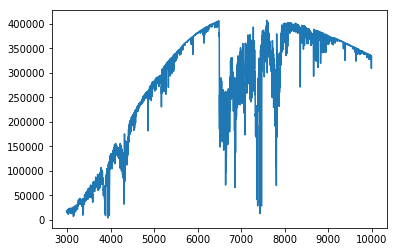

In [12]:
plt.plot(frames[0]['wl'], frames[0]['bflux']*frames[0]['flux'])